In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
dataset = pd.read_csv(r"archive\heart_cleveland_upload.csv")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


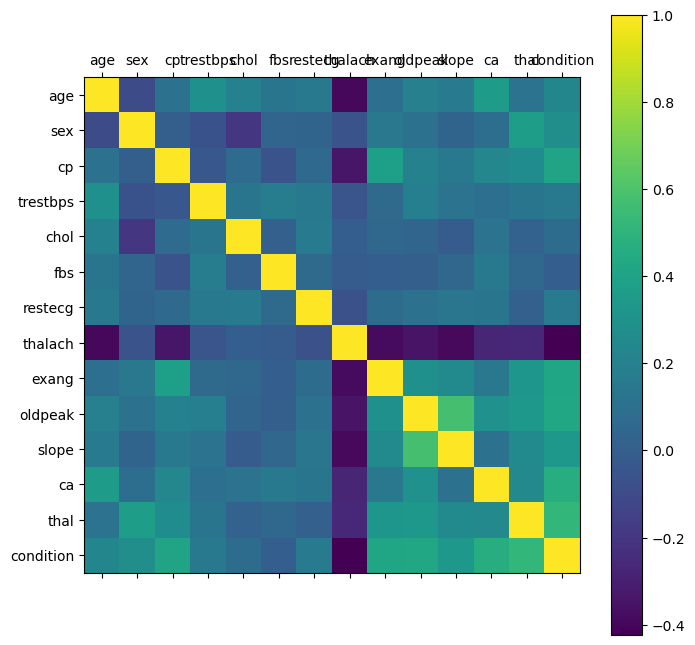

In [7]:
rcParams['figure.figsize'] = 12, 8
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

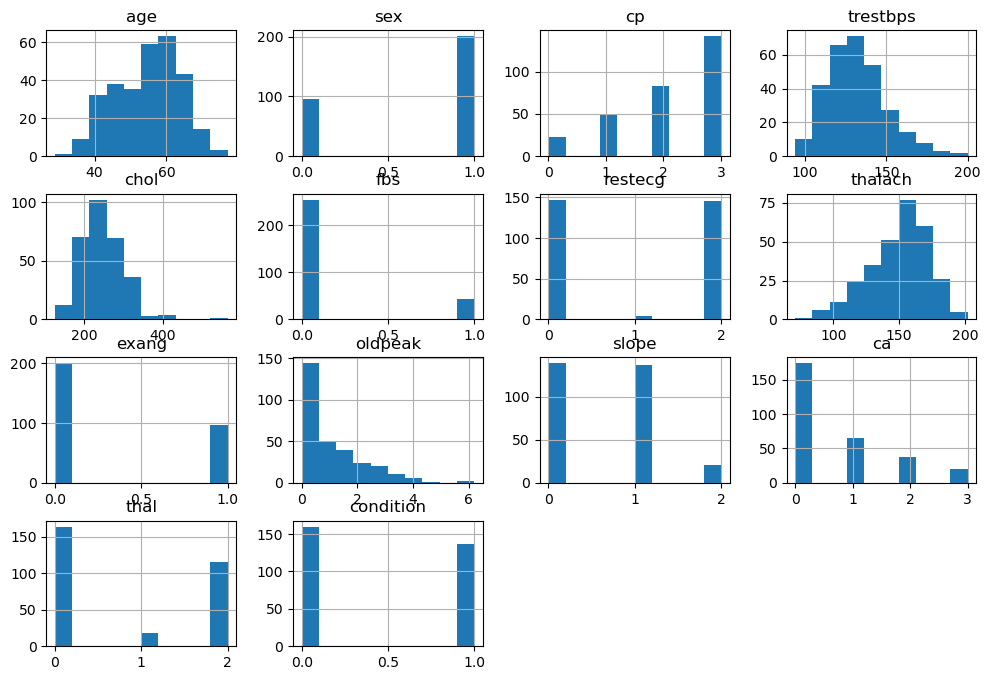

In [8]:
dataset.hist()

Text(0.5, 1.0, 'Count of each Target Class')

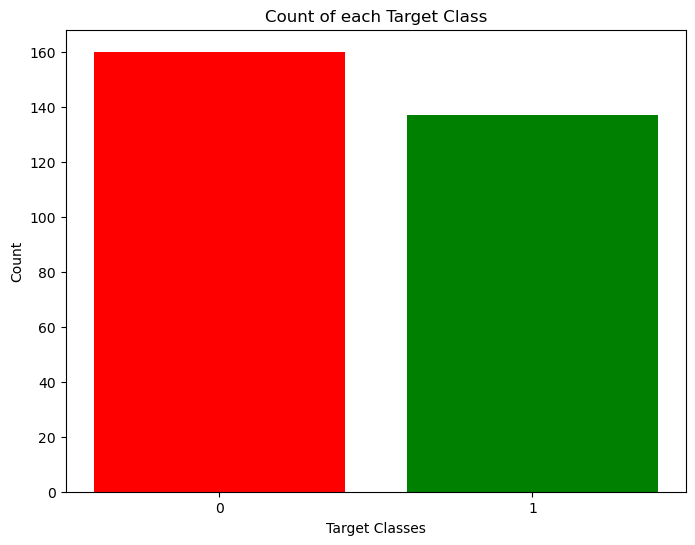

In [9]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['condition'].unique(), dataset['condition'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [10]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [18]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
predicted_class = ['condition']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
x = dataset[columns_to_scale].values
y = dataset[predicted_class].values

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
smote = SMOTE(random_state=10)
x_smote, y_smote = smote.fit_resample(x, y)

In [21]:
y = dataset['condition']
X = dataset.drop(['condition'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [22]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

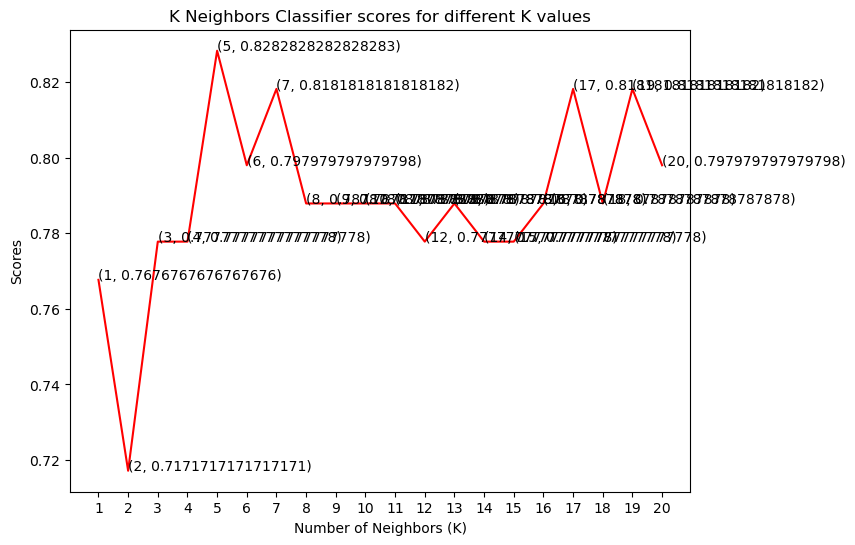

In [23]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [24]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[4]*100, 5))

The score for K Neighbors Classifier is 82.82828282828282% with 5 nieghbors.


In [25]:
    knn_classifier = KNeighborsClassifier(n_neighbors = 5)
    knn_classifier.fit(X_train, y_train)
    y_test_predictions=knn_classifier.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_predictions)

conf_matrix

array([[38,  5],
       [12, 44]], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_predictions).round(2)

0.83

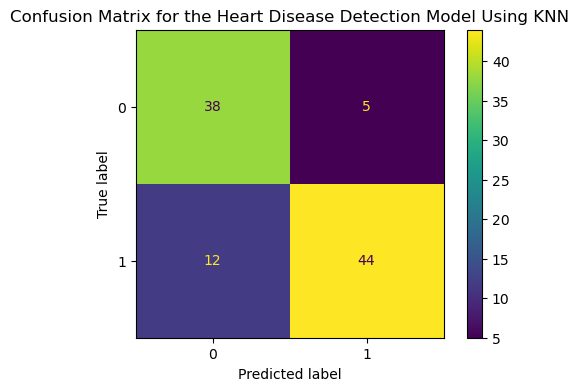

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6,4), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=knn_classifier.classes_)

ax.set(title='Confusion Matrix for the Heart Disease Detection Model Using KNN')

display.plot(ax=ax);

In [29]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

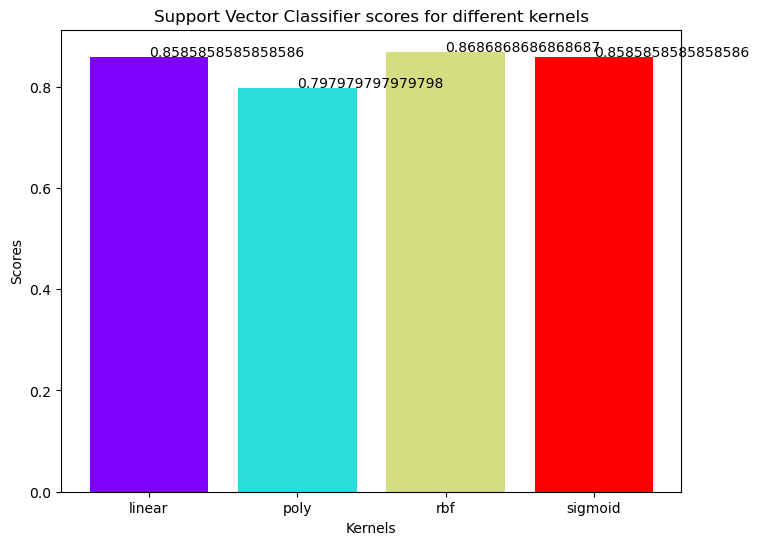

In [30]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [31]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[2]*100, 'rbf'))

The score for Support Vector Classifier is 86.86868686868688% with rbf kernel.


In [32]:
svc_classifier = SVC(kernel = kernels[i])
svc_classifier.fit(X_train, y_train)
y_test_predictions =svc_classifier.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_predictions)

conf_matrix

array([[38,  5],
       [ 9, 47]], dtype=int64)

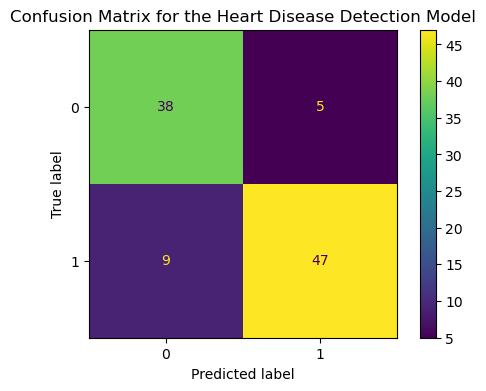

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6,4), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=svc_classifier.classes_)

ax.set(title='Confusion Matrix for the Heart Disease Detection Model')

display.plot(ax=ax);

In [35]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

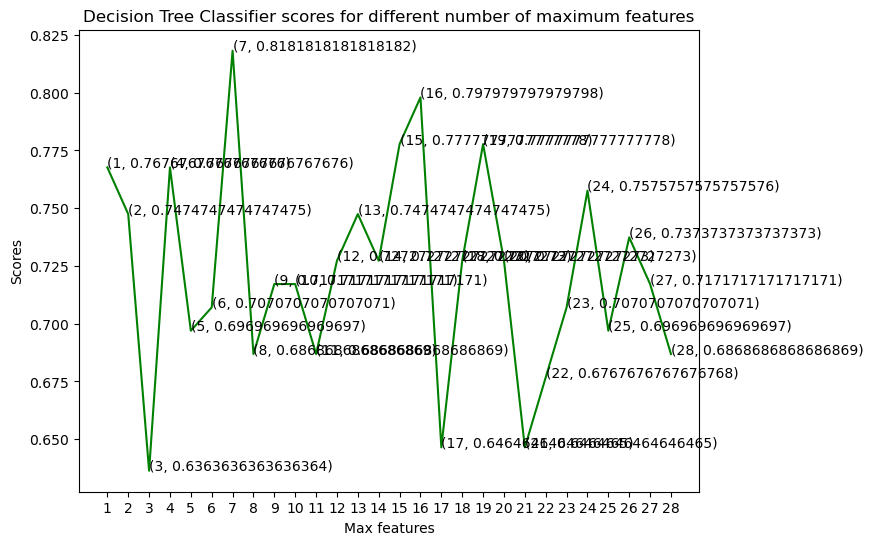

In [36]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [37]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[6]*100, 7))

The score for Decision Tree Classifier is 81.81818181818183% with 7 maximum features.


In [38]:
dt_classifier = DecisionTreeClassifier(max_features = 7, random_state = 0)
dt_classifier.fit(X_train, y_train)
y_test_predictions =dt_classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_predictions)

conf_matrix

array([[35,  8],
       [10, 46]], dtype=int64)

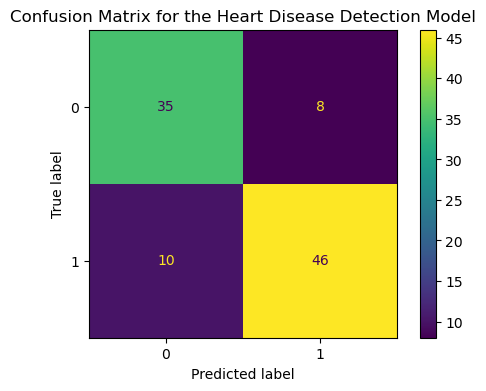

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6,4), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=dt_classifier.classes_)

ax.set(title='Confusion Matrix for the Heart Disease Detection Model')

display.plot(ax=ax);

In [41]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

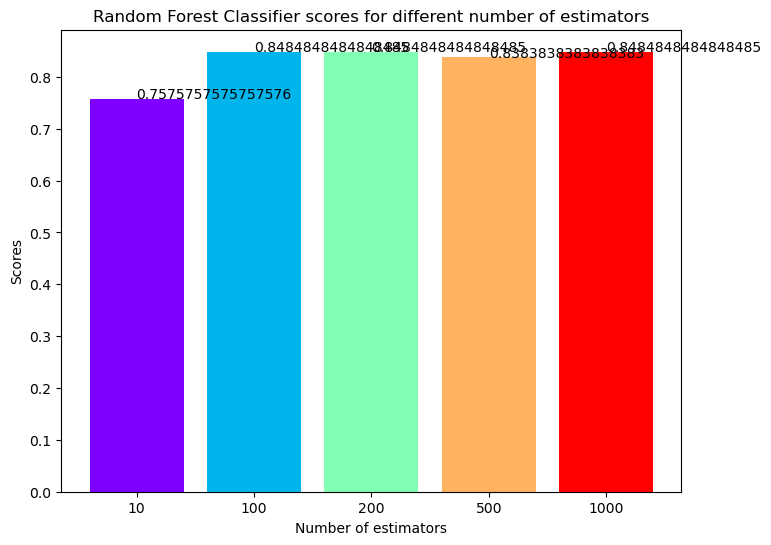

In [42]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [43]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 1000]))

The score for Random Forest Classifier is 84.84848484848484% with [100, 1000] estimators.


In [44]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_classifier.fit(X_train, y_train)
y_test_predictions =rf_classifier.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_predictions)

conf_matrix

array([[37,  6],
       [ 9, 47]], dtype=int64)

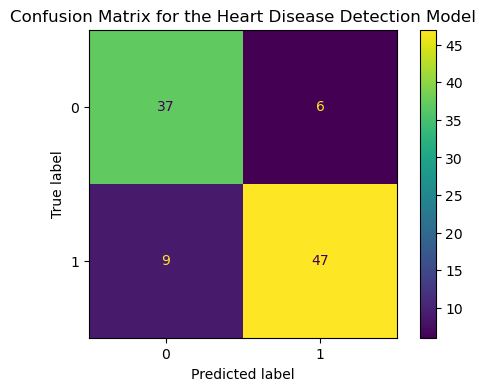

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6,4), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=rf_classifier.classes_)

ax.set(title='Confusion Matrix for the Heart Disease Detection Model')

display.plot(ax=ax);